In [1]:
### SQL DB ###

In [2]:
import pandas as pd
import sqlite3

df = pd.DataFrame([
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "apples", "quantity": 3, "price": 1},
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "oranges", "quantity": 4, "price": 0.8},
    {"state": "wi", "city": "madison", "address": "123 Main St.", "item": "cantaloupe", "quantity": 5, "price": 2},
    {"state": "wi", "city": "milwaukee", "address": "456 State St", "item": "apples", "quantity": 6, "price": 0.9},
    {"state": "wi", "city": "milwaukee", "address": "456 State St.", "item": "oranges", "quantity": 8, "price": 1.2},
])
connection = sqlite3.connect("grocery.db")
df.to_sql("sales", connection, if_exists="replace", index=False)

5

In [3]:
pd.read_sql("SELECT * FROM sales", connection)

,state,city,address,item,quantity,price
0,wi,madison,123 Main St.,apples,3,1.0
1,wi,madison,123 Main St.,oranges,4,0.8
2,wi,madison,123 Main St.,cantaloupe,5,2.0
3,wi,milwaukee,456 State St,apples,6,0.9
4,wi,milwaukee,456 State St.,oranges,8,1.2


In [4]:
pd.read_sql("SELECT item, SUM(quantity*price) AS dollars FROM sales GROUP BY item", connection)

,item,dollars
0,apples,8.4
1,cantaloupe,10.0
2,oranges,12.8


In [5]:
pd.read_sql("Select state, city, address, SUM(quantity*price) AS dollars From sales GROUP BY state, city, address", connection)

,state,city,address,dollars
0,wi,madison,123 Main St.,16.2
1,wi,milwaukee,456 State St,5.4
2,wi,milwaukee,456 State St.,9.6


In [6]:
df = pd.DataFrame([
    {"location_id": 1, "state": "wi", "city": "madison", "address": "123 Main St."},
    {"location_id": 2, "state": "wi", "city": "milwaukee", "address": "456 State St."},
])
df.to_sql("locations", connection, if_exists="replace", index=False)

df = pd.DataFrame([
    {"location_id": 1, "item": "apples", "quantity": 3, "price": 1},
    {"location_id": 1, "item": "oranges", "quantity": 4, "price": 0.8},
    {"location_id": 1, "item": "cantaloupe", "quantity": 5, "price": 2},
    {"location_id": 2, "item": "apples", "quantity": 6, "price": 0.9},
    {"location_id": 2, "item": "oranges", "quantity": 8, "price": 1.2},
])
df.to_sql("sales", connection, if_exists="replace", index=False)

5

In [7]:
pd.read_sql("SELECT * FROM sales", connection)

,location_id,item,quantity,price
0,1,apples,3,1.0
1,1,oranges,4,0.8
2,1,cantaloupe,5,2.0
3,2,apples,6,0.9
4,2,oranges,8,1.2


In [8]:
pd.read_sql("SELECT * FROM locations", connection)

,location_id,state,city,address
0,1,wi,madison,123 Main St.
1,2,wi,milwaukee,456 State St.


In [9]:
pd.read_sql("SELECT * FROM locations INNER JOIN sales ON locations.location_id = sales.location_id", connection)

,location_id,state,city,address,location_id,item,quantity,price
0,1,wi,madison,123 Main St.,1,apples,3,1.0
1,1,wi,madison,123 Main St.,1,cantaloupe,5,2.0
2,1,wi,madison,123 Main St.,1,oranges,4,0.8
3,2,wi,milwaukee,456 State St.,2,apples,6,0.9
4,2,wi,milwaukee,456 State St.,2,oranges,8,1.2


In [10]:
pd.read_sql("""
  SELECT * FROM 
  locations INNER JOIN sales 
  ON locations.location_id = sales.location_id""",
  connection).drop(columns="location_id")

,state,city,address,item,quantity,price
0,wi,madison,123 Main St.,apples,3,1.0
1,wi,madison,123 Main St.,cantaloupe,5,2.0
2,wi,madison,123 Main St.,oranges,4,0.8
3,wi,milwaukee,456 State St.,apples,6,0.9
4,wi,milwaukee,456 State St.,oranges,8,1.2


In [11]:
pd.read_sql("""
  SELECT item, SUM(quantity*price) AS dollars
  FROM locations INNER JOIN sales 
  ON locations.location_id = sales.location_id
  GROUP BY item""", connection)

,item,dollars
0,apples,8.4
1,cantaloupe,10.0
2,oranges,12.8


In [12]:
pd.read_sql("""
  SELECT state, city, address, SUM(quantity*price) AS dollars
  FROM locations INNER JOIN sales 
  ON locations.location_id = sales.location_id
  GROUP BY locations.location_id""", connection)

,state,city,address,dollars
0,wi,madison,123 Main St.,16.2
1,wi,milwaukee,456 State St.,15.0


In [13]:
### RASTER MD ###

In [14]:
import rasterio
land = rasterio.open("zip://../../mp6/land.zip!wi.tif")

<Axes: >

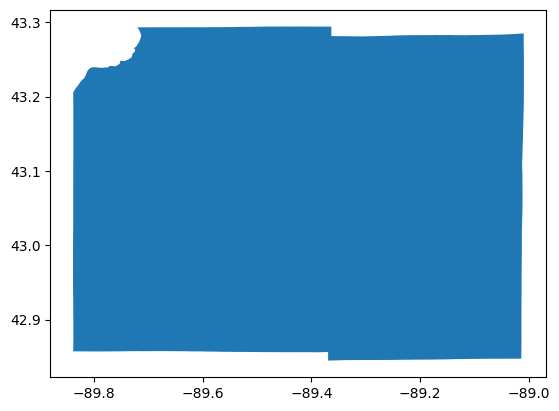

In [15]:
import geopandas as gpd
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Dane+County%27&text=&objectIds=&time=&timeRelation=esriTimeRelationOverlaps&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&sqlFormat=none&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
dane = gpd.read_file(url)
dane.plot()

In [16]:
from rasterio.mask import mask
matrix, _ = mask(land, dane.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

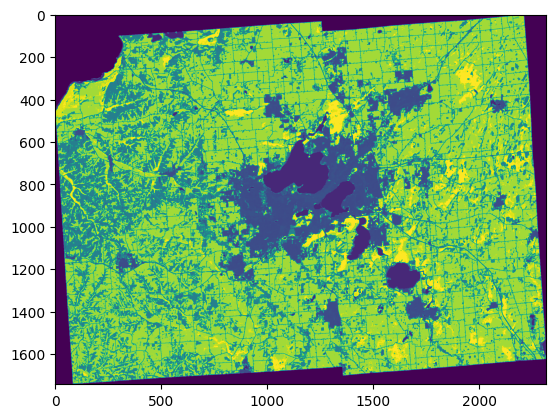

In [17]:
# legend: https://www.mrlc.gov/data/legends/national-land-cover-database-2019-nlcd2019-legend
import matplotlib.pyplot as plt
plt.imshow(matrix)

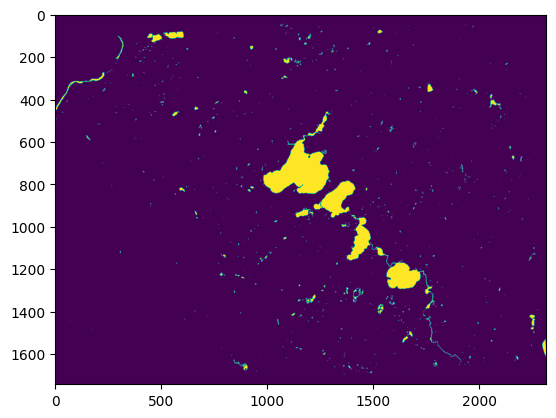

In [18]:
# water is encoded as 11. highlight all water regions in Dane County with this:
plt.imshow(matrix == 11)

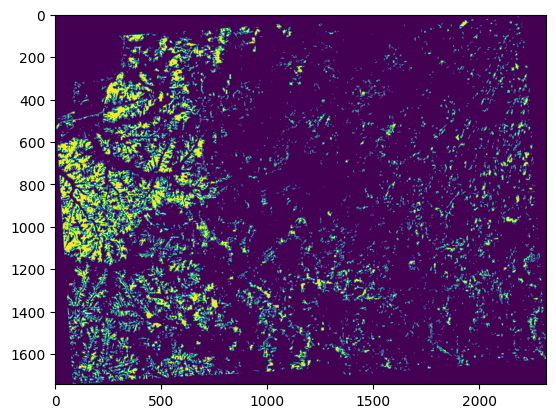

In [19]:
# Deciduous Forest
plt.imshow(matrix == 41)

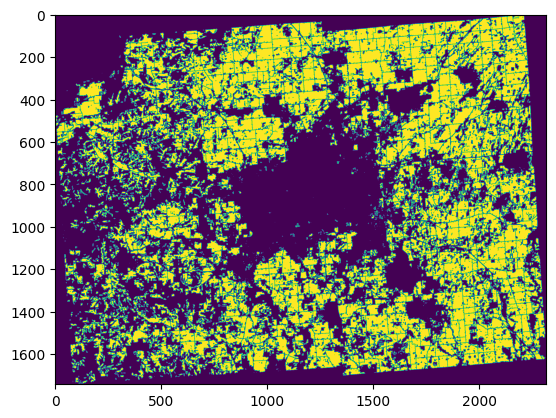

In [20]:
# Cultivated Crops
plt.imshow(matrix == 82)

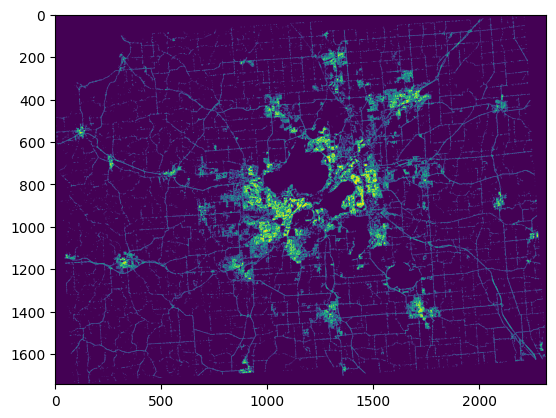

In [21]:
# Developed, Low Intensity
plt.imshow(matrix == 22)

In [22]:
### NumPy Array ###

In [23]:
import numpy as np
a = np.array([
    [0,0,5,8],
    [1,2,4,8],
    [2,4,6,9],
])

In [24]:
a % 2

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [25]:
a % 2 == 0

array([[ True,  True, False,  True],
       [False,  True,  True,  True],
       [ True,  True,  True, False]])

In [26]:
(a % 2 == 0).astype(int)

array([[1, 1, 0, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0]])

In [27]:
(a % 2 == 0).astype(int).sum()

np.int64(9)

In [28]:
(a % 2 == 0).astype(int).mean() * 100

np.float64(75.0)